# Análise dos Outliers

## Importação de Módulos

In [2]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# aplicação
from sklearn.preprocessing import scale
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [4]:
pip install scipy statsmodels

## Carregar Dados

In [5]:
import os
print(os.path.getsize('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2019.csv'))

7076406


In [6]:
dados_petshop_2019 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2019.csv', encoding='ISO-8859-1', sep=';')
dados_petshop_2020 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2020.csv', encoding='ISO-8859-1', sep=';')
dados_petshop_2021 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2021.csv', encoding='ISO-8859-1', sep=';')
dados_petshop_2022 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2022.csv', encoding='ISO-8859-1', sep=';')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Questão 1 - Quantidade

## Identificação

#2019

In [7]:
dados_petshop_2019.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22,2.0,44,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,"0,44","17,6",Alimentação
1,2,Norte,Biscoito True Champion 300g,21,2.0,42,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,"0,42","16,8",Alimentação
2,3,Norte,Biscoito True Champion 300g,22,NaN,44,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,"0,88","35,2",Alimentação
3,4,Norte,Biscoito True Champion 300g,19,4.0,88,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,"0,76","30,4",Alimentação
4,5,Norte,Biscoito True Champion 300g,22,2.0,44,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,"0,44","17,6",Alimentação


<Axes: >

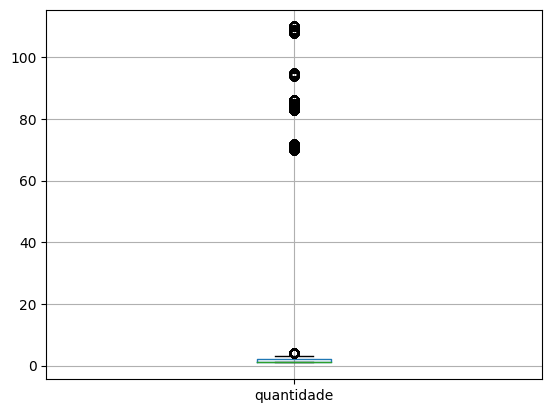

In [8]:
# Método do Boxplot
dados_petshop_2019[['quantidade']].boxplot()

#2020

In [9]:
dados_petshop_2020.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,"24,64",2,"49,28",12/03/2020,Acre,Cartão Crédito,Rapid Pink,Carlos,"1,76","26,4",Alimentação
1,50285,Norte,Biscoito True Champion 300g,"23,52",2,"47,04",10/04/2020,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,"1,68","25,2",Alimentação
2,50286,Norte,Biscoito True Champion 300g,"24,64",4,"98,56",07/08/2020,Pará,Dinheiro,Rapid Pink,Julia,"3,52","52,8",Alimentação
3,50287,Norte,Biscoito True Champion 300g,"21,28",4,"85,12",10/01/2020,Rondônia,Pix,Rapid Pink,Yuri,"3,04","45,6",Alimentação
4,50288,Norte,Biscoito True Champion 300g,"24,64",,"49,28",11/04/2020,Tocantins,Cartão Crédito,Rapid Pink,Dolores,"1,76","26,4",Alimentação


<Axes: >

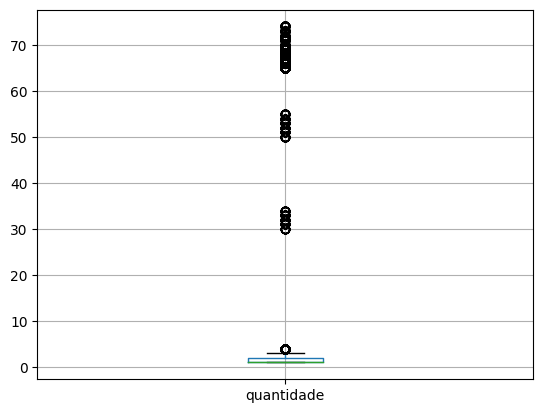

In [10]:
# Converter coluna 'quantidade' para tipo numérico
dados_petshop_2020['quantidade'] = pd.to_numeric(dados_petshop_2020['quantidade'], errors='coerce')

# Método do Boxplot
dados_petshop_2020[['quantidade']].boxplot()

#2021

In [11]:
dados_petshop_2021.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,100567,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,"1020,11",1,"1020,11",02/11/2021,Ceará,Cartão Crédito,Gold Beach,Neide,"53,69","230,1",Bebedouros e Comedouros
1,100568,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,"1135,82",1,"1135,82",19/12/2021,Maranhão,Cartão Crédito,Gold Beach,Clarice,"59,78","256,2",Bebedouros e Comedouros
2,100569,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,"1054,69",1,"1054,69",16/09/2021,Paraíba,Boleto Bancário,Gold Beach,Cristina,"55,51","237,9",Bebedouros e Comedouros
3,100570,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,"1167,74",1,"1167,74",18/01/2021,Pernambuco,Pix,Gold Beach,Claudio,"61,46","263,4",Bebedouros e Comedouros
4,100571,Sudeste,Nutri Alimentador Inteligente Automático Câmer...,"1173,06",1,"1173,06",27/11/2021,Piauí,Dinheiro,Gold Beach,Cristian,"61,74","264,6",Bebedouros e Comedouros


<Axes: >

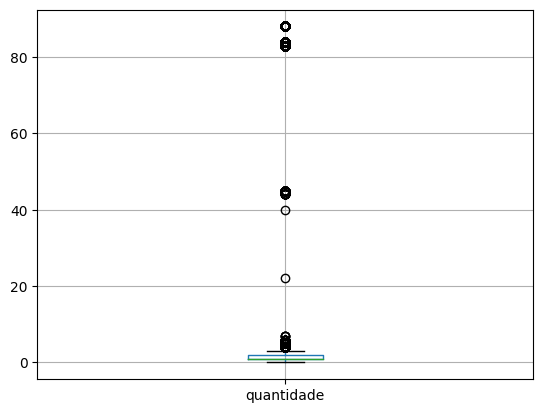

In [12]:
# Converter coluna 'quantidade' para tipo numérico
dados_petshop_2021['quantidade'] = pd.to_numeric(dados_petshop_2021['quantidade'], errors='coerce')

# Método do Boxplot
dados_petshop_2021[['quantidade']].boxplot()

#2022

In [13]:
dados_petshop_2022.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,150581,Norte,Biscoito True Champion 300g,"35,64",22.0,"784,08",01/03/2022,Acre,Pix,Rapid Pink,Carlos,"4,84","193,6",Alimentação
1,150582,Norte,Biscoito True Champion 300g,"34,02",2.0,"68,04",19/02/2022,Amapá,Boleto Bancário,Rapid Pink,Maria Linda,"0,42","16,8",Alimentação
2,150583,Norte,Biscoito True Champion 300g,"35,64",4.0,"142,56",19/02/2022,Pará,Boleto Bancário,Rapid Pink,Julia,"0,88","35,2",Alimentação
3,150584,Norte,Biscoito True Champion 300g,"30,78",4.0,"123,12",22/02/2022,Rondônia,Dinheiro,Rapid Pink,Yuri,"0,76","30,4",Alimentação
4,150585,Norte,Biscoito True Champion 300g,"35,64",2.0,"71,28",18/03/2022,Tocantins,Dinheiro,Rapid Pink,Dolores,"0,44","17,6",Alimentação


<Axes: >

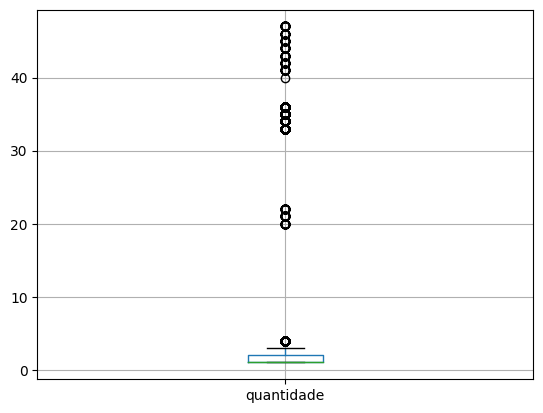

In [14]:
# Método do Boxplot
dados_petshop_2022[['quantidade']].boxplot()

## Técnica de Winzorizar os dados

#2019

In [15]:
# obter os quartis
wins_values = dados_petshop_2019['quantidade'].quantile([0.05, 0.9]).to_list()

# winsorizar
dados_petshop_2019['quantidade_wins'] = dados_petshop_2019['quantidade'] \
                                        .clip(wins_values[0], wins_values[1])

# ver os dados
dados_petshop_2019[['quantidade', 'quantidade_wins']].head(10)

,quantidade,quantidade_wins
0,2.0,2.0
1,2.0,2.0
2,NaN,NaN
3,4.0,3.0
4,2.0,2.0
5,4.0,3.0
6,3.0,3.0
7,2.0,2.0
8,2.0,2.0
9,4.0,3.0


<Axes: >

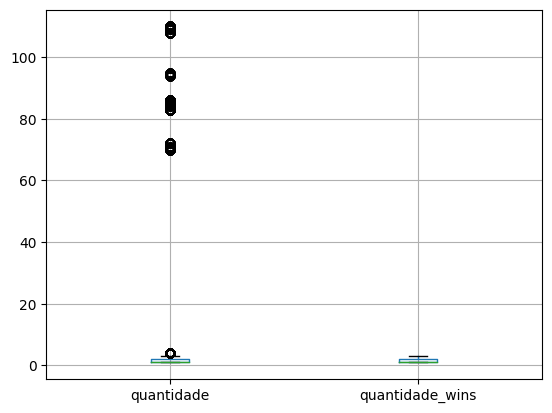

In [16]:
# box plot
dados_petshop_2019[['quantidade', 'quantidade_wins']].boxplot()

#2020

In [17]:
# obter os quartis
wins_values = dados_petshop_2020['quantidade'].quantile([0.05, 0.9]).to_list()

# winsorizar
dados_petshop_2020['quantidade_wins'] = dados_petshop_2020['quantidade'] \
                                        .clip(wins_values[0], wins_values[1])

# ver os dados
dados_petshop_2020[['quantidade', 'quantidade_wins']].head(10)

,quantidade,quantidade_wins
0,2.0,2.0
1,2.0,2.0
2,4.0,3.0
3,4.0,3.0
4,NaN,NaN
5,4.0,3.0
6,3.0,3.0
7,2.0,2.0
8,NaN,NaN
9,4.0,3.0


<Axes: >

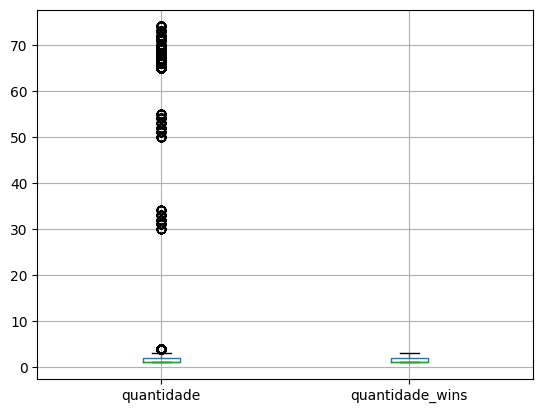

In [18]:
# box plot
dados_petshop_2020[['quantidade', 'quantidade_wins']].boxplot()

#2021

In [19]:
# obter os quartis
wins_values = dados_petshop_2021['quantidade'].quantile([0.05, 0.9]).to_list()

# winsorizar
dados_petshop_2021['quantidade_wins'] = dados_petshop_2021['quantidade'] \
                                        .clip(wins_values[0], wins_values[1])

# ver os dados
dados_petshop_2021[['quantidade', 'quantidade_wins']].head(10)

,quantidade,quantidade_wins
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,2.0,2.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


<Axes: >

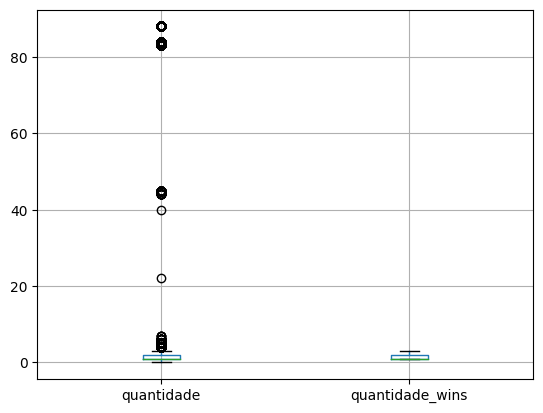

In [20]:
# box plot
dados_petshop_2021[['quantidade', 'quantidade_wins']].boxplot()

#2022

In [21]:
# obter os quartis
wins_values = dados_petshop_2022['quantidade'].quantile([0.05, 0.9]).to_list()

# winsorizar
dados_petshop_2022['quantidade_wins'] = dados_petshop_2022['quantidade'] \
                                        .clip(wins_values[0], wins_values[1])

# ver os dados
dados_petshop_2022[['quantidade', 'quantidade_wins']].head(10)

,quantidade,quantidade_wins
0,22.0,3.0
1,2.0,2.0
2,4.0,3.0
3,4.0,3.0
4,2.0,2.0
5,4.0,3.0
6,3.0,3.0
7,2.0,2.0
8,2.0,2.0
9,4.0,3.0


<Axes: >

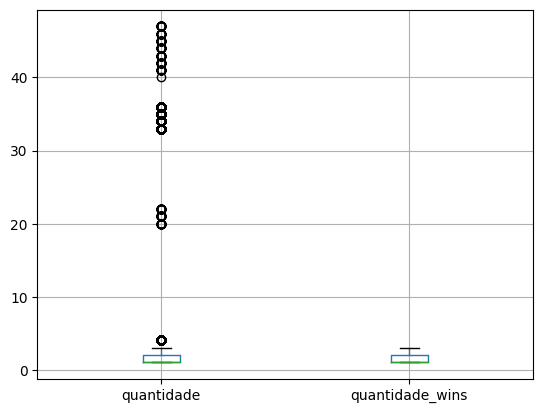

In [22]:
# box plot
dados_petshop_2022[['quantidade', 'quantidade_wins']].boxplot()

## Questão 2 - Teste de Hipóteses

In [23]:
# Carregar os dados em DataFrames separados
df_vendas_petshop_2019 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2019.csv', encoding='ISO-8859-1', sep=';')
df_vendas_petshop_2020 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2020.csv', encoding='ISO-8859-1', sep=';')
df_vendas_petshop_2021 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2021.csv', encoding='ISO-8859-1', sep=';')
df_vendas_petshop_2022 = pd.read_csv('/content/drive/MyDrive/FLG - FIAP/Entregas Fases/Fase 5/vendas_linha_petshop_2022.csv', encoding='ISO-8859-1', sep=';')

# Concatenar todos os DataFrames em um único DataFrame
df = pd.concat([df_vendas_petshop_2019, df_vendas_petshop_2020, df_vendas_petshop_2021, df_vendas_petshop_2022])

# Converter a coluna 'valor' para float
df['valor'] = df['valor'].str.replace(',', '.').astype(float)

# Remover os missings
df = df.dropna()

# Média da população
media_populacao = df['valor'].mean()

# Média por região
media_por_regiao = df.groupby('regiao_pais')['valor'].mean()

# Média por modalidade de pagamento
media_por_modalidade = df.groupby('formapagto')['valor'].mean()

### Para Regiões:

In [24]:
from scipy import stats

resultados_regiao = {}
for regiao in df['regiao_pais'].unique():
    # Filtrar os preços dessa região
    precos_regiao = df[df['regiao_pais'] == regiao]['valor']

    # Teste t de Student
    t_stat, p_val = stats.ttest_1samp(precos_regiao, media_populacao)

    # Armazenar o resultado
    resultados_regiao[regiao] = {'t_stat': t_stat, 'p_val': p_val}

# Mostrar resultados
for regiao, resultado in resultados_regiao.items():
    print(f"Região: {regiao}, t-stat: {resultado['t_stat']:.4f}, p-valor: {resultado['p_val']:.4f}")

Região: Norte, t-stat: -0.0205, p-valor: 0.9836
Região: Centro Oeste, t-stat: 0.1838, p-valor: 0.8542
Região: Nordeste, t-stat: 0.0495, p-valor: 0.9606
Região: Sudeste, t-stat: -0.0602, p-valor: 0.9520
Região: Sul, t-stat: -0.1733, p-valor: 0.8624


### Para Modalidade de Pagamento:

In [25]:
resultados_modalidade = {}
for modalidade in df['formapagto'].unique():
    # Filtrar os preços dessa modalidade de pagamento
    precos_modalidade = df[df['formapagto'] == modalidade]['valor']

    # Teste t de Student
    t_stat, p_val = stats.ttest_1samp(precos_modalidade, media_populacao)

    # Armazenar o resultado
    resultados_modalidade[modalidade] = {'t_stat': t_stat, 'p_val': p_val}

# Mostrar resultados
for modalidade, resultado in resultados_modalidade.items():
    print(f"Modalidade: {modalidade}, t-stat: {resultado['t_stat']:.4f}, p-valor: {resultado['p_val']:.4f}")

Modalidade: Cartão Crédito, t-stat: 1.8377, p-valor: 0.0661
Modalidade: Dinheiro, t-stat: -0.0440, p-valor: 0.9649
Modalidade: Pix, t-stat: 0.1269, p-valor: 0.8990
Modalidade: Boleto Bancário, t-stat: -0.4802, p-valor: 0.6311
Modalidade: Cartão Débito, t-stat: -1.5127, p-valor: 0.1304


## Questão 3 - Correlações

In [26]:
# Substituir valores nulos com NaN e Converter em tipo numérico
df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce')
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# Calcular a Matriz de Correlação
correlation_matrix = df[['quantidade', 'valor']].corr()

# Exibir a Matriz de Correlação
print(correlation_matrix)

            quantidade     valor
quantidade    1.000000 -0.013636
valor        -0.013636  1.000000


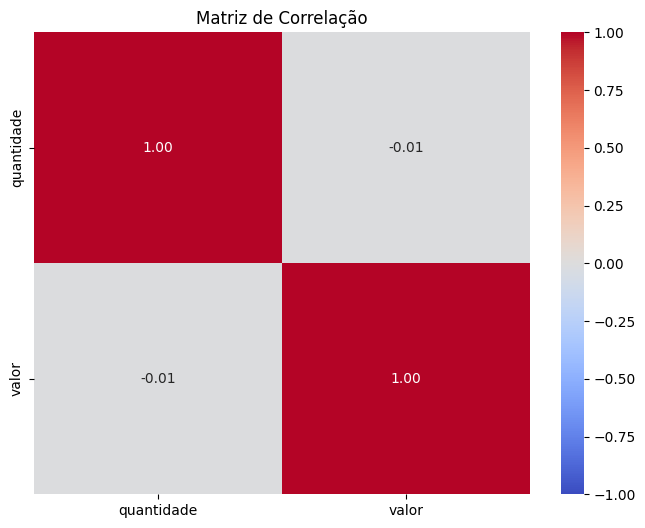

In [27]:
# Plotar a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()